# Project 2: 

## Objective: To track the impact of the living conditions of students aged 15 to 22 on their math performance in order to identify students at an early stage at risk

## Task: prepare the dataset for further modeling


In [ ]:
import pandas as pd
df = pd.read_csv(
    '/Users/evgeny/Documents/GitHub/skillfactory/module_2/stud_math.xls')
df.info()

# Import libraries:

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from itertools import combinations
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Functions:<a name="func"></a>

In [102]:
# general column analysis
def first_analisis(data):
    count_empty = 0
    count = 0
    for i in data:
        print(i, ':')
        print(data[i].value_counts())

        print('Empty field =', len(data) - data[i].value_counts().sum())
        print('-----------------------------')


# function for matching gaps to NaN
def no_nan(df):
    for i in df:
        # print(i)
        k = 0
        for n in range(0, len(df)):

            if pd.isnull(df[i][n]):
                k += 1
        print('No NaN obects in ', i, ':', k -
              (len(df) - df[i].value_counts().sum()))


# list of columns with categorical values
object_list = []
for i in df:
    if df[i].dtype == object:
        object_list.append(i)


# boxplot plotting function for categorical values
def get_boxplot(column,dt):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score', data=dt, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# hypothesis testing using stats.ttest_ind 
def get_stat_dif(column,data):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if stats.ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all):
            print('Found statistically significant differences for the column', column)
            break

# Data analysis<a name="analisis"></a>


In [4]:
first_analisis(df)


school :
GP    349
MS     46
Name: school, dtype: int64
Empty field = 0
-----------------------------
sex :
F    208
M    187
Name: sex, dtype: int64
Empty field = 0
-----------------------------
age :
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
Empty field = 0
-----------------------------
address :
U    295
R     83
Name: address, dtype: int64
Empty field = 17
-----------------------------
famsize :
GT3    261
LE3    107
Name: famsize, dtype: int64
Empty field = 27
-----------------------------
Pstatus :
T    314
A     36
Name: Pstatus, dtype: int64
Empty field = 45
-----------------------------
Medu :
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
Empty field = 3
-----------------------------
Fedu :
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
Empty field = 24
-----------------------------
Mjob :
other       133
services     98
at_home     

In [5]:
# there are gaps, let's analyze their type and quantity
no_nan(df)
# all gaps in columns have NaN values, leave unchanged

No NaN obects in  school : 0
No NaN obects in  sex : 0
No NaN obects in  age : 0
No NaN obects in  address : 0
No NaN obects in  famsize : 0
No NaN obects in  Pstatus : 0
No NaN obects in  Medu : 0
No NaN obects in  Fedu : 0
No NaN obects in  Mjob : 0
No NaN obects in  Fjob : 0
No NaN obects in  reason : 0
No NaN obects in  guardian : 0
No NaN obects in  traveltime : 0
No NaN obects in  studytime : 0
No NaN obects in  failures : 0
No NaN obects in  schoolsup : 0
No NaN obects in  famsup : 0
No NaN obects in  paid : 0
No NaN obects in  activities : 0
No NaN obects in  nursery : 0
No NaN obects in  studytime, granular : 0
No NaN obects in  higher : 0
No NaN obects in  internet : 0
No NaN obects in  romantic : 0
No NaN obects in  famrel : 0
No NaN obects in  freetime : 0
No NaN obects in  goout : 0
No NaN obects in  health : 0
No NaN obects in  absences : 0
No NaN obects in  score : 0


## Checking column values for errors and make changes

In [6]:
# there is a bug in the Fedu column, fix it to Mode
df.Fedu.mode()
df.Fedu = df.Fedu.apply(lambda x: df.Fedu.mode()[0] if x == 40.0 else x)

In [7]:
# studytime, granular no description for the data completely duplicates
# studytime only with different values - delete the column
df.drop(['studytime, granular'], inplace=True, axis=1)

In [8]:
# famrel error in value (-1 does not match 0 <x <6), fix it to Mode
df.famrel = df.famrel.apply(lambda x: df.famrel.mode()[0] if x == -1 else x)

In [9]:
# columns with categorical features, replace numerical values with descriptions for them
df.Medu = df.Medu.apply(lambda x: 'No' if x == 0 else '4 class' if x == 1 else '5-9 class'
                        if x == 2 else 'sec special/11 class' if x == 3 else 'higher'
                        if x == 4 else x)

df.Fedu = df.Fedu.apply(lambda x: 'No' if x == 0 else '4 class' if x == 1 else '5-9 class'
                        if x == 2 else 'sec special/11 class' if x == 3 else 'higher'
                        if x == 4 else x)

df.studytime = df.studytime.apply(lambda x:  '< 2 h' if x == 1 else '2-5 h'
                                  if x == 2 else ' 5-10 h' if x == 3 else '>10 h'
                                  if x == 4 else x)

df.traveltime = df.traveltime.apply(lambda x:  '< 15 min' if x == 1 else '15-30 min'
                                    if x == 2 else ' 30-60 min' if x == 3 else '>60 min'
                                    if x == 4 else x)

df.failures = df.failures.apply(lambda x: 'otherwise' if x == 0 else '1 fail' if x == 1 else '2 fail'
                                if x == 2 else '3 fail' if x == 3 else x)

df.famrel = df.famrel.apply(lambda x:  'very bad' if x == 1 else 'bad'
                            if x == 2 else 'midle' if x == 3 else 'good'
                            if x == 4 else 'very good' if x == 5 else x)

df.freetime = df.freetime.apply(lambda x:  'very little' if x == 1 else 'little'
                                if x == 2 else 'midle' if x == 3 else 'many'
                                if x == 4 else 'a lot' if x == 5 else x)

df.goout = df.goout.apply(lambda x:  'very little' if x == 1 else 'little'
                          if x == 2 else 'midle' if x == 3 else 'many'
                          if x == 4 else 'a lot' if x == 5 else x)

df.health = df.health.apply(lambda x:  'very bad' if x == 1 else 'bad'
                            if x == 2 else 'midle' if x == 3 else 'good'
                            if x == 4 else 'very good' if x == 5 else x)

### in the end we have float64(2), int64(1), object(26)

## Let's analyze columns with numeric variables

In [10]:
# age
for i in df.age:
    if 14 < i < 23:
        continue
    else:
        print("Values are not correct: ", i)
# no errors

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Граница справа:  78


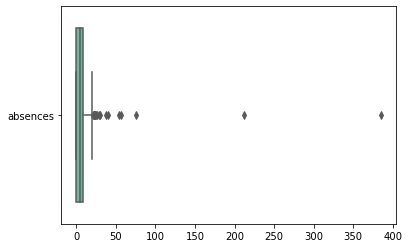

In [11]:
# absences
# analyze outliers and anomalies

df_absences = pd.DataFrame(df.absences)
sns.boxplot(data=df_absences, orient="h", palette="Set2")

# see outliers, calculate the confidence interval

IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25th percentile: {},'.format(perc25), '75th percentile: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Emission limits: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# using the interquartile range, we got the Ejection Bounds: [-12.0, 20.0],
# with such boundaries, 17 lines are out of bounds

# calculate the bounds using the standard deviation
s = np.std(df.absences, ddof=1)
m = df.absences.mean()
right_b = m + 3*s
print('Border on the right: ', round(right_b))
df.query('absences > 78')
right_b
# two lines are missing from the border.
# suppose a student can skip at most 78 lessons, replace the two outliers with the median

df.absences = df.absences.apply(
    lambda x: df.absences.median() if x > 78 else x)

In [12]:
# there are gaps replace them with the mean value
df['absences'] = df['absences'].apply(lambda x: df['absences'].mean() if pd.isnull(x) else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    object 
 7   Fedu        371 non-null    object 
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    object 
 13  studytime   388 non-null    object 
 14  failures    373 non-null    object 
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    object 
 7   Fedu        365 non-null    object 
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    object 
 13  studytime   382 non-null    object 
 14  failures    367 non-null    object 
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

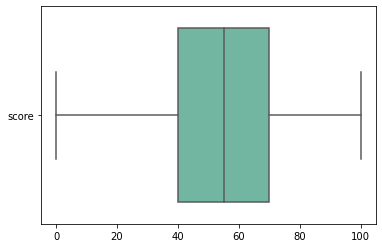

In [13]:
# score
df_score = pd.DataFrame(df.score)
sns.boxplot(data=df_score, orient="h", palette="Set2")

# no outliers detected

# remove gaps
df = df.dropna(subset=['score'])
df.info()

# Correlation analysis

,age,absences,score
age,1.000000,0.167398,-0.155726
absences,0.167398,1.000000,0.030323
score,-0.155726,0.030323,1.000000


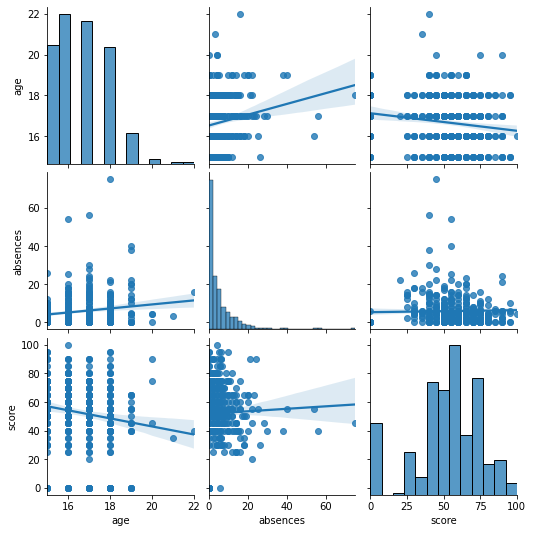

In [36]:
sns.pairplot(df, kind='reg')
df.corr()
# correlation no found

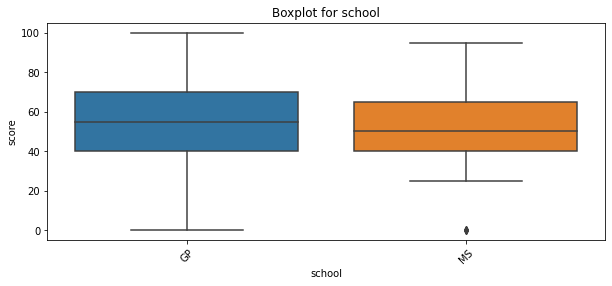

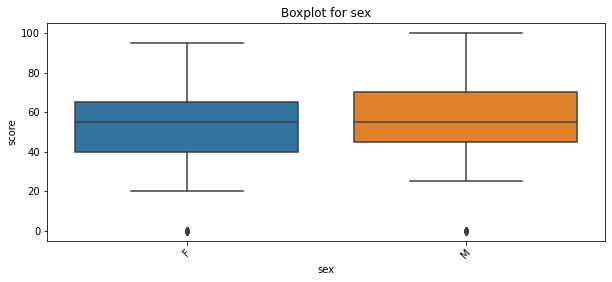

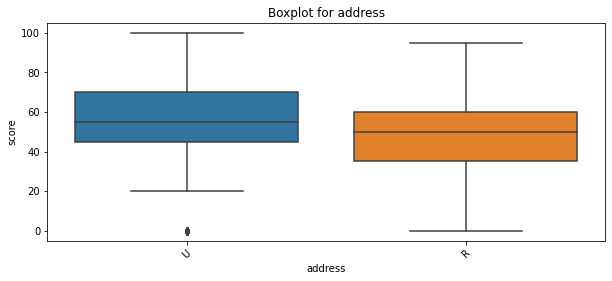

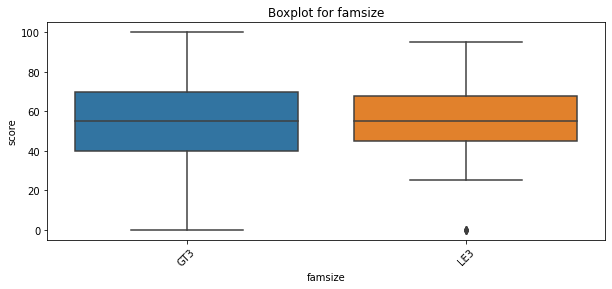

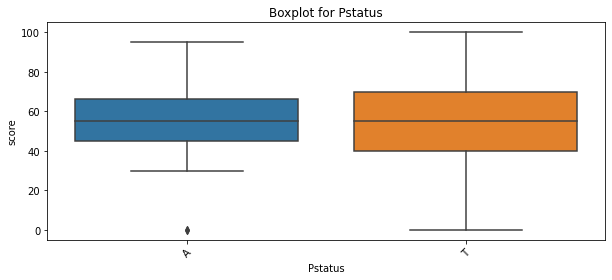

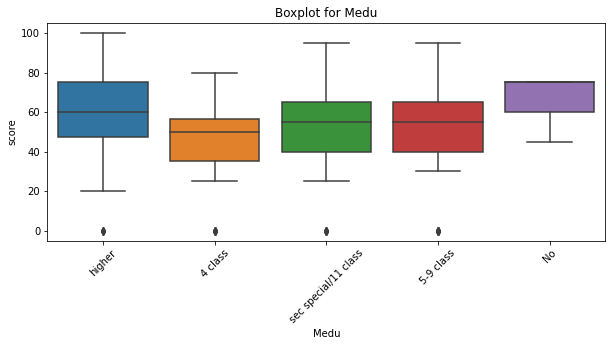

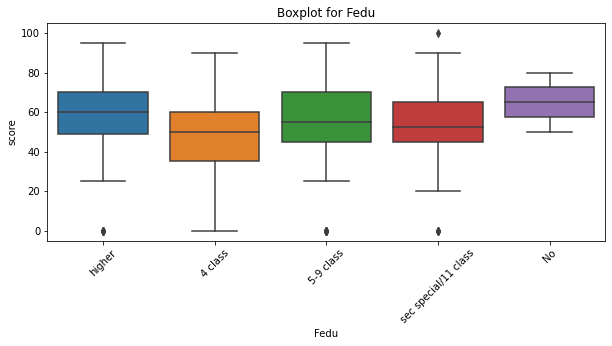

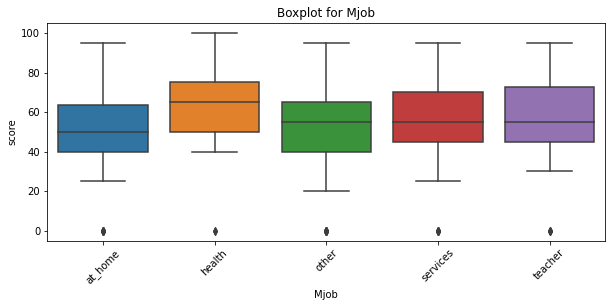

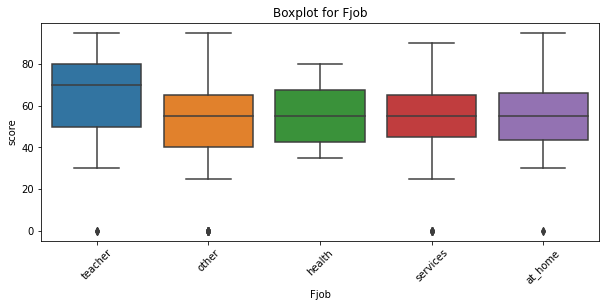

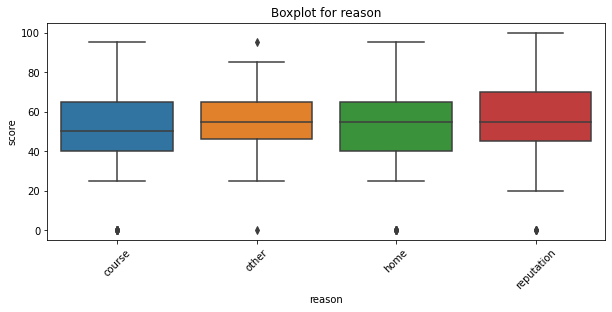

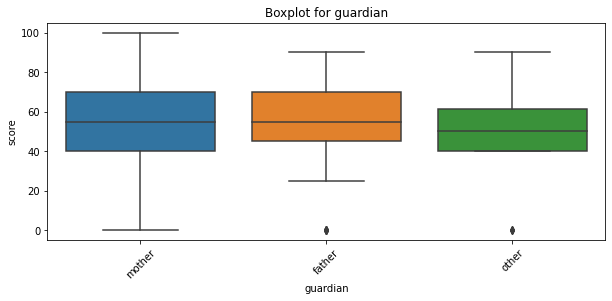

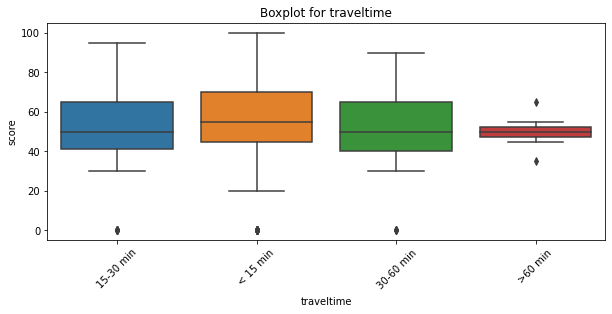

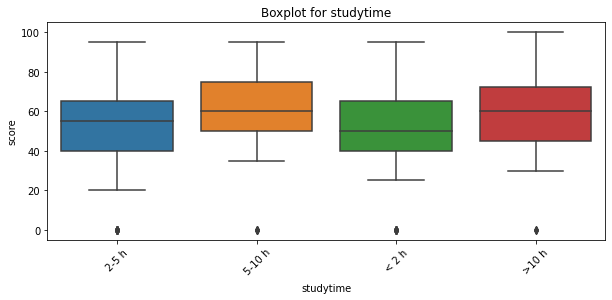

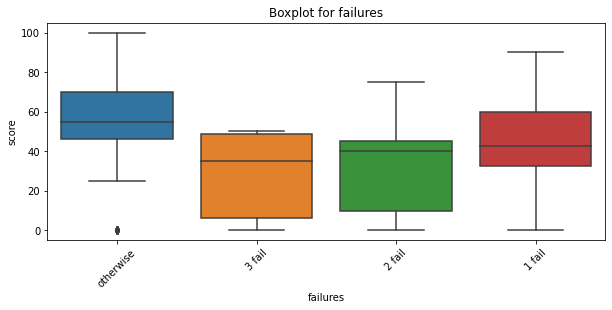

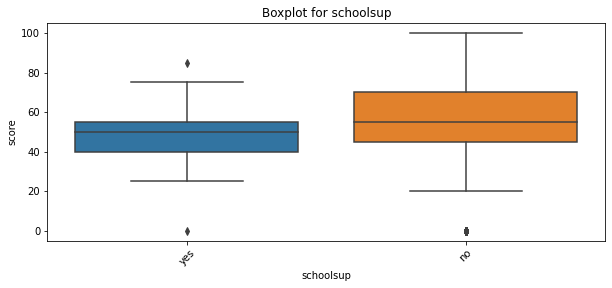

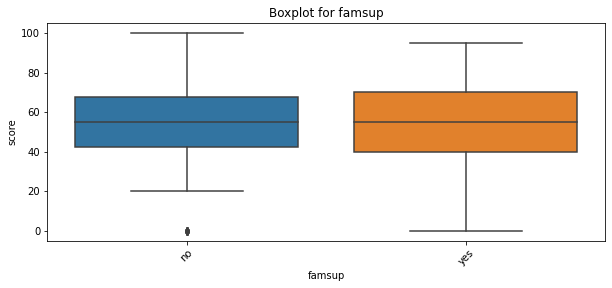

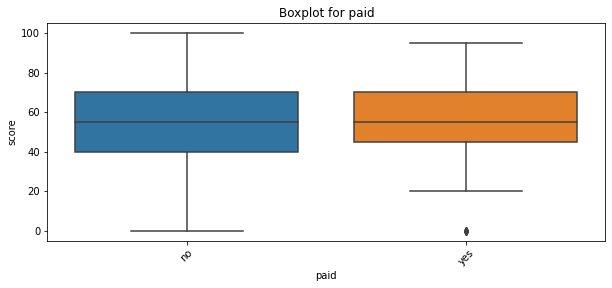

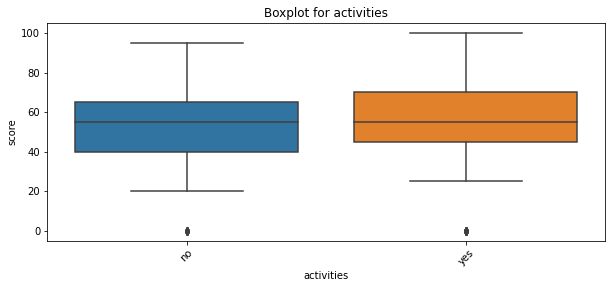

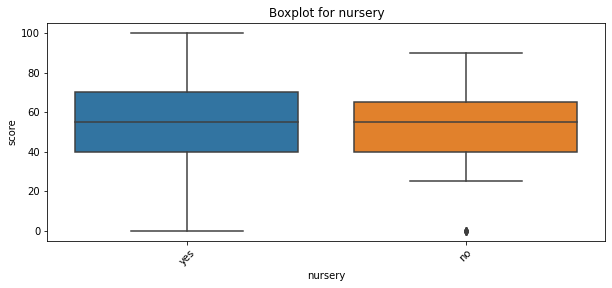

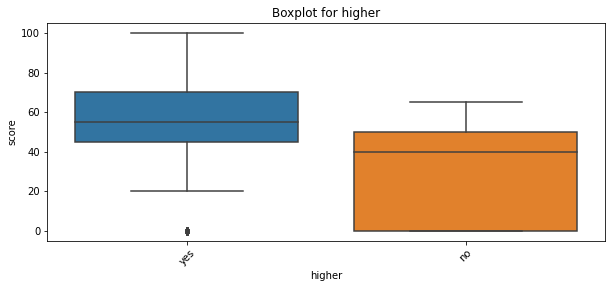

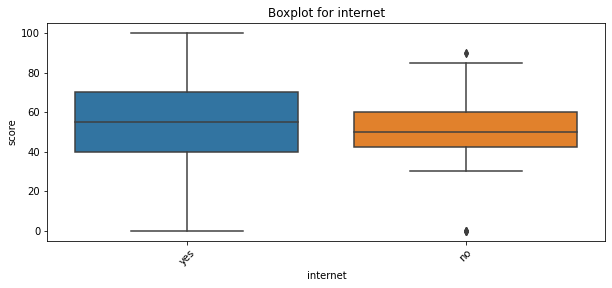

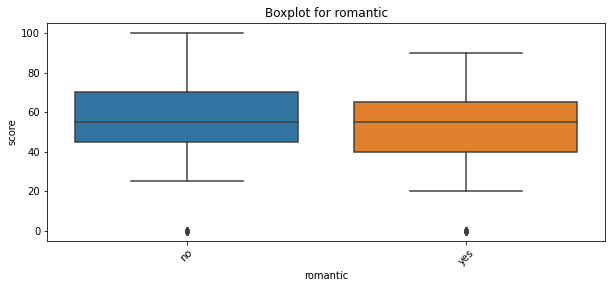

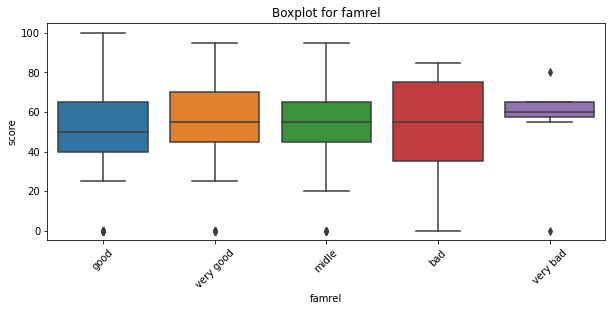

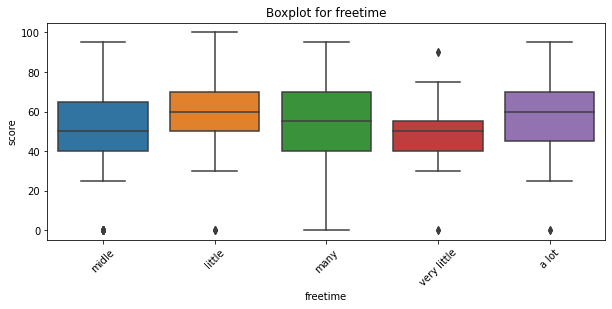

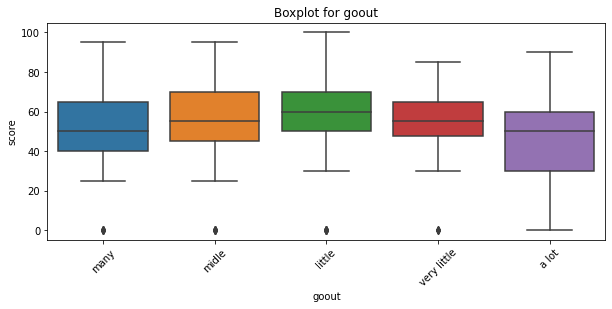

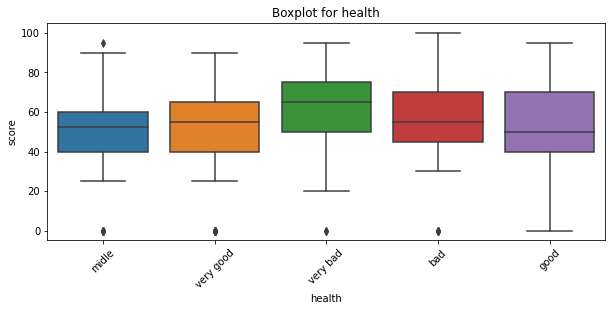

In [95]:
# Building a boxplot chart

object_list = []
for i in df:
    if df[i].dtype == object:
        object_list.append(i)

for col in object_list:
    get_boxplot(col, df)

In [103]:
# Finding statistical differences
for col in object_list:
    get_stat_dif(col, df)

Found statistically significant differences for the column address
Found statistically significant differences for the column Medu
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column failures
Found statistically significant differences for the column higher
Found statistically significant differences for the column romantic
Found statistically significant differences for the column goout


In [104]:
# in the boxplot we see a lot of values with score == 0, let's look at the result without 0
df_no_zero_score = df.copy()
df_no_zero_score.score = df_no_zero_score.score.loc[df_no_zero_score.score > 0]
df_no_zero_score = df_no_zero_score.dropna(subset=['score'])

for col in object_list:
    get_stat_dif(col, df_no_zero_score)
# we see that found 2 stat differences more

Found statistically significant differences for the column address
Found statistically significant differences for the column Medu
Found statistically significant differences for the column Fedu
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column Fjob
Found statistically significant differences for the column studytime
Found statistically significant differences for the column failures
Found statistically significant differences for the column schoolsup
Found statistically significant differences for the column goout


In [105]:
# look at the statistical differences by replacing NaN in categorical values with mode
def category_mode(column, data):
    data[column] = data[column].apply(lambda x: data[column].mode()[0] if pd.isnull(x) else x)

df_mode = df.copy()
for col in object_list:
    category_mode(col, df_mode)
for col in object_list:
    get_stat_dif(col,df_mode)


Found statistically significant differences for the column address
Found statistically significant differences for the column Medu
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column failures
Found statistically significant differences for the column higher
Found statistically significant differences for the column romantic


In [106]:
# look at the result of the differences with score! = 0 and NaN replaced with mode

df_mode.score = df_mode.score.loc[df_mode.score > 0]
df_mode = df_mode.dropna(subset=['score'])
for col in object_list:
    get_stat_dif(col,df_mode)
df_mode.corr()

Found statistically significant differences for the column address
Found statistically significant differences for the column Medu
Found statistically significant differences for the column Fedu
Found statistically significant differences for the column Mjob
Found statistically significant differences for the column Fjob
Found statistically significant differences for the column studytime
Found statistically significant differences for the column failures
Found statistically significant differences for the column schoolsup
Found statistically significant differences for the column goout


,age,absences,score
age,1.000000,0.204930,-0.131542
absences,0.204930,1.000000,-0.211119
score,-0.131542,-0.211119,1.000000


# Result

### Presence of ratings = 0, affects the number of differences of non-categorical features.

### Most likely, the student who received a grade of 0 was not present at the exam, exclude the results with a grade of 0

### Take df_mode as the basis for the model

### Leave the columns 'sex' ( perhaps it will be possible to ungroup the student by gender), 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'goout', 'age', 'absences', 'score'

In [108]:
df_for_model = df_mode.loc[:, ['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                               'studytime', 'failures', 'schoolsup', 'goout', 'age', 'absences', 'score']]
df_for_model

,sex,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,goout,age,absences,score
0,F,U,higher,higher,at_home,teacher,2-5 h,otherwise,yes,many,18,6.0,30.0
1,F,U,4 class,4 class,at_home,other,2-5 h,otherwise,no,midle,17,4.0,30.0
2,F,U,4 class,4 class,at_home,other,2-5 h,3 fail,yes,little,15,10.0,50.0
3,F,U,higher,5-9 class,health,other,5-10 h,otherwise,no,little,15,2.0,75.0
4,F,U,sec special/11 class,sec special/11 class,other,other,2-5 h,otherwise,no,little,16,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,U,5-9 class,5-9 class,services,services,2-5 h,2 fail,no,many,20,4.0,45.0
391,M,U,sec special/11 class,4 class,services,services,< 2 h,otherwise,no,a lot,17,3.0,80.0
392,M,R,4 class,4 class,other,other,< 2 h,3 fail,no,midle,21,3.0,35.0
393,M,R,sec special/11 class,5-9 class,services,other,< 2 h,otherwise,no,very little,18,0.0,50.0
